In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #,StandardScaler
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import warnings
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utilities")

from features_creation import features_creation

pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../data/crawling_preprocess_data.csv',sep = ',')

In [3]:
pd.options.display.max_columns = None
data.head(5)

,Tournament,Phase,Home Team,Away Team,Match Date,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Three Pointers Made,Team Three Pointers Attempted,Team Free Throws Made,Team Free Throws Attempted,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Blocks,Team Turnovers,Team Personal Fouls,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Blocks,Opponent Turnovers,Opponent Personal Fouls,Team,Opponent Team,Team Result,Winner Team,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptFGM,opptPoss,teamDrtg,teamEDiff,team_Game_Score,Team Performance Index,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Opponent Performance Index,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Liga ACB,Regular Season,FC BARCELONA BÀSQUET,SASKI BASKONIA,2014-10-04,87.0,34.0,54.0,10.0,13.0,9.0,12.0,5.0,29.0,34.0,15.0,10.0,2.0,22.0,17.0,65.0,28.0,66.0,1.0,10.0,8.0,12.0,9.0,16.0,25.0,14.0,16.0,2.0,14.0,19.0,FC BARCELONA BÀSQUET,SASKI BASKONIA,1,FC BARCELONA BÀSQUET,67.0,44.0,57.627119,34.090909,60.182623,73.134328,23.809524,76.315789,23.334748,87.940476,11.371328,2.274266,3.030303,1.298507,52.380952,15.194489,0.681818,0.454545,55.500,98.930554,76.0,29.0,82.889211,78.417926,20.512627,61.8,102.0,42.372881,48.275862,39.985236,38.815789,23.684211,76.190476,14.693535,19.302874,2.412859,3.703704,0.855263,33.000,78.417926,98.930554,-20.512627,35.802469,14.181524,1.000000,1.142857,38.5,64.0,22.0,0,0,0,0,1,0,0
1,Liga ACB,Regular Season,REAL BETIS BALONCESTO,CB 1939 CANARIAS,2014-10-04,87.0,33.0,66.0,8.0,18.0,13.0,19.0,8.0,23.0,31.0,13.0,8.0,1.0,13.0,27.0,96.0,35.0,63.0,8.0,20.0,18.0,30.0,10.0,25.0,35.0,24.0,8.0,1.0,12.0,19.0,REAL BETIS BALONCESTO,CB 1939 CANARIAS,0,CB 1939 CANARIAS,84.0,41.0,46.969697,31.707317,47.098311,53.571429,24.242424,69.696970,12.338648,93.446061,8.561089,1.070136,1.587302,1.035714,46.067416,12.790240,1.000000,0.615385,37.625,93.101838,83.0,43.0,94.030303,102.094747,-8.992909,48.7,80.0,53.030303,55.813953,49.896050,56.626506,30.303030,75.757576,11.090573,8.507896,1.063487,1.515152,1.156627,62.750,102.094747,93.101838,8.992909,50.588235,22.684310,2.000000,0.666667,70.7,129.0,-9.0,0,0,0,0,1,0,0
2,Liga ACB,Regular Season,OBRADOIRO CAB,BÀSQUET MANRESA,2014-10-04,88.0,28.0,51.0,11.0,21.0,21.0,22.0,5.0,24.0,29.0,22.0,8.0,3.0,16.0,24.0,64.0,21.0,56.0,4.0,15.0,18.0,24.0,14.0,14.0,28.0,6.0,6.0,2.0,16.0,20.0,OBRADOIRO CAB,BÀSQUET MANRESA,1,OBRADOIRO CAB,72.0,39.0,50.877193,56.410256,53.868756,61.805556,26.315789,63.157895,16.380016,87.507895,9.142032,3.428262,5.357143,1.222222,46.987952,21.929825,1.375000,0.500000,53.750,100.562355,71.0,25.0,78.466316,81.563661,18.998694,63.4,105.0,49.122807,24.000000,39.234919,38.028169,36.842105,73.684211,16.400164,7.646593,2.548864,3.921569,0.901408,14.250,81.563661,100.562355,-18.998694,34.246575,7.278020,0.375000,0.375000,23.5,59.0,24.0,0,0,0,0,1,0,0
3,Liga ACB,Regular Season,BILBAO BASKET,BALONCESTO FUENLABRADA,2014-10-05,73.0,24.0,59.0,7.0,25.0,18.0,23.0,10.0,23.0,33.0,15.0,9.0,2.0,10.0,23.0,54.0,18.0,60.0,2.0,22.0,16.0,23.0,14.0,21.0,35.0,8.0,5.0,0.0,13.0,22.0,BILBAO BASKET,BALONCESTO FUENLABRADA,1,BILBAO BASKET,84.0,31.0,48.529412,48.387097,38.780280,41.071429,32.258065,62.162162,9.604303,84.906452,10.599901,2.355534,3.333333,0.869048,36.904762,15.169903,1.500000,0.900000,33.125,85.976977,82.0,20.0,79.098378,68.269415,17.707562,40.2,79.0,51.470588,40.000000,2

In [4]:
data['Match Date']=pd.to_datetime(data['Match Date'])

In [5]:
data.shape

(5035, 95)

# Greek Basket League

In [6]:
greece_features = pd.read_csv('Features_Per_Tournament/greece_features.csv',sep = ',')

x_greece = greece_features.iloc[:,:-1]
y_greece = greece_features.iloc[:,-1]

x1_greece = data[(data['Tournament'] =="Basket League")&(data['Match Date'] >"2015-8-01")]

In [7]:
x_greece.shape

(818, 110)

In [8]:
x_greece.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Regular Season
0,1.0,1.0,7.0,22.0,20.691625,36.272927,1.0,7.0,20.691625,2.697837,19617.604936,0.021522,0.132626,3.864286,-2.691521,12.113692,1.104125,13.406937,15.742308,11.902729,-1.217963,10.895729,4.863882,4.725092,5.026149,3.615474,0.272487,-1.773251,-1.419051,2.561980,-1.068985,-0.927238,-2.149415,-1.202029,-2.283690,0.755220,0.831502,1.362363,-0.325644,0.860806,-0.719548,-0.583000,1.310432,4.275830,2.699273,1.084520,1.057300,2.731742,2.239463,10.214222,-66.285264,0.046398,0.4,13.300000,-4.303036,19.626030,-0.463336,15.775000,22.200,16.1600,-7.216473,12.409558,8.330930,8.100000,7.936675,9.930607,3.530514,0.969907,2.208850,4.572344,-0.899955,-1.075087,-1.431267,-0.369238,-2.948286,-9.812500,-13.800,-9.660,-4.262440,-5.200000,-3.637079,-5.090056,3.761373,2.476803,4.558903,2.833103,0.311053,4.263591,3.752194,4.386473,15.498649,4.232510,16.781320,5.540459,7.637681,6.305797,-4.232510,1.500151,0.989235,0.721508,0.594618,1.453589,0.378547,0.894967,-0.648454,0.717389,-0.371731,-0.773385,0.632850,1
1,1.0,0.0,22.0,13.0,26.081218,9.442758,1.0,22.0,26.081218,2.594468,4503.073132,-0.006929,0.085165,2.337912,-2.692297,0.743345,-2.352542,-2.390453,-3.483516,-4.095879,-2.637556,-1.894211,-2.480582,-5.909341,-1.191807,-2.921867,-5.555462,-5.272644,-4.819458,-2.323571,-2.068638,-1.186722,-1.369147,-0.814667,-0.485738,-6.621909,-11.156593,-8.248626,-1.114009,-8.247253,-0.794556,-2.339786,-5.257465,-8.088316,-6.256904,-0.953947,-4.687549,-2.352116,-2.561866,9.799667,4248.942175,0.051849,0.3,2.800000,4.493276,-1.451209,4.846608,-7.975000,-9.300,-10.2900,-3.801941,-

In [9]:
corr_df = greece_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
110,Team Result,1.000000
13,history_pointsdiff,0.572921
53,Current_form_pointsdiff,0.559687
12,history_winner,0.541112
15,history_Ediff,0.536295
9,pi_ratings,0.510304
55,Current_form_EDiff,0.506986
52,Current_form_winner,0.506510
17,history_FIC,0.503181
3,tradition_pointsdiff_general,0.496668


## Classifiers

In [10]:
x_greece_scaled = MinMaxScaler().fit_transform(x_greece)
#x_greece_scaled = StandardScaler().fit_transform(x_greece)

In [11]:
x_train_greece=x_greece_scaled[:len(x1_greece[x1_greece["Match Date"]<"2018-8-1"])]
y_train_greece=y_greece.iloc[:len(x1_greece[x1_greece["Match Date"]<"2018-8-1"])]
x_test_greece=x_greece_scaled[len(x1_greece[x1_greece["Match Date"]<"2018-8-1"]):]
y_test_greece=y_greece.iloc[len(x1_greece[x1_greece["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [12]:
lgr = LogisticRegression(solver='liblinear',C=0.6938346614477142, penalty =  'l2').fit(x_train_greece, y_train_greece)
y_pre_proba_lgr=lgr.predict_proba(x_test_greece)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_greece),3))


Logistic Regression

Test BS: 0.169

Test Accuracy: 0.767

Test F1-score: 0.829


In [13]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_greece.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'greek_league')
sorted_coef1

,feature_name,value
0,pagerank,1.632850
1,history_pointsdiff_sd,1.261619
2,Tournament_home_winner,-1.115555
3,history_pointsdiff,1.114496
4,elo,1.087209
5,pi_ratings,1.062941
6,tradition_winner_general,0.967727
7,Current_form_pointsdiff,0.919757
8,history_Ediff_sd,0.880881
9,history_Ortg_sd,-0.747471


## Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(max_depth= 13,max_features= 'sqrt',  min_samples_leaf= 0.040856687662947255,
                             min_samples_split= 0.1208432060337375,n_estimators= 79, 
                            random_state =2).fit(x_train_greece, y_train_greece)

y_pre_proba_rfc=rfc.predict_proba(x_test_greece)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_greece),3))

Random Forest Classifier

Test BS: 0.16

Test Accuracy: 0.743

Test F1-score: 0.814


In [15]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_greece.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'greek_league')
sorted_coef2

,feature_name,value
0,pagerank,0.096330
1,history_pointsdiff,0.090146
2,pi_ratings,0.078502
3,Current_form_pointsdiff,0.063921
4,tradition_pointsdiff_general,0.043023
5,history_winner,0.039297
6,history_Ediff,0.038797
7,Current_form_EDiff,0.035025
8,history_Points,0.033921
9,history_FIC,0.032954


## xgboost

In [16]:
alg = XGBClassifier(booster='gbtree', objective='binary:logistic', colsample_bytree=0.622779742930514,
                    gamma=9.956582635690857,learning_rate=0.1345234453980909,max_depth=4,
                    n_estimators=81,reg_lambda= 0.9892757700055931,subsample=0.8024427587538274, 
                    verbosity=1).fit(x_train_greece, y_train_greece)

y_pre_proba_alg=alg.predict_proba(x_test_greece)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_greece),3))


xgboost

Test BS: 0.165

Test Accuracy: 0.743

Test F1-score: 0.814


In [17]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_greece.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'greek_league')
sorted_coef3

,feature_name,value
0,Current_form_pointsdiff,0.145328
1,pagerank,0.062714
2,pi_ratings,0.051945
3,history_pointsdiff,0.049943
4,history_Points,0.047015
5,history_winner,0.043874
6,elo,0.032385
7,history_FIC_received,0.028587
8,Current_form_EDiff,0.027891
9,tradition_winner_general,0.026436


# Ensemble

In [18]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_greece),3))


------Ensemble 3 classifier-------

Test BS: 0.161

Test Accuracy: 0.752

Test F1-score: 0.821


In [19]:
pd.options.display.max_rows = None
see_final_g=x1_greece[["Home Team","Away Team","Team Result"]][x1_greece["Match Date"]>"2018-8-1"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4106,G.S. LAVRIO B.C.,ARIS B.C.,0,0.732714,0.536870
4127,RETHYMNO CRETAN KINGS B.C.,G.S. LAVRIO B.C.,0,0.732595,0.536696
4131,PROMITHEAS PATRAS B.C.,PERISTERI B.C.,0,0.805911,0.649493
4215,KYMIS B.C.,PERISTERI B.C.,0,0.723422,0.523340
4311,G.S. LAVRIO B.C.,KOLOSSOS RODOU B.C.,0,0.842857,0.710408
4313,GYMNASTIKOS S. LARISSAS 1928 B.C.,P.A.O.K. BC,1,0.149394,0.723530
4496,RETHYMNO CRETAN KINGS B.C.,GYMNASTIKOS S. LARISSAS 1928 B.C.,0,0.734497,0.539486
4626,G.S. LAVRIO B.C.,RETHYMNO CRETAN KINGS B.C.,0,0.742423,0.551192
4750,ARIS B.C.,KOLOSSOS RODOU B.C.,0,0.806567,0.650550
4776,RETHYMNO CRETAN KINGS B.C.,PANIONIOS F.C.,0,0.733088,0.537418


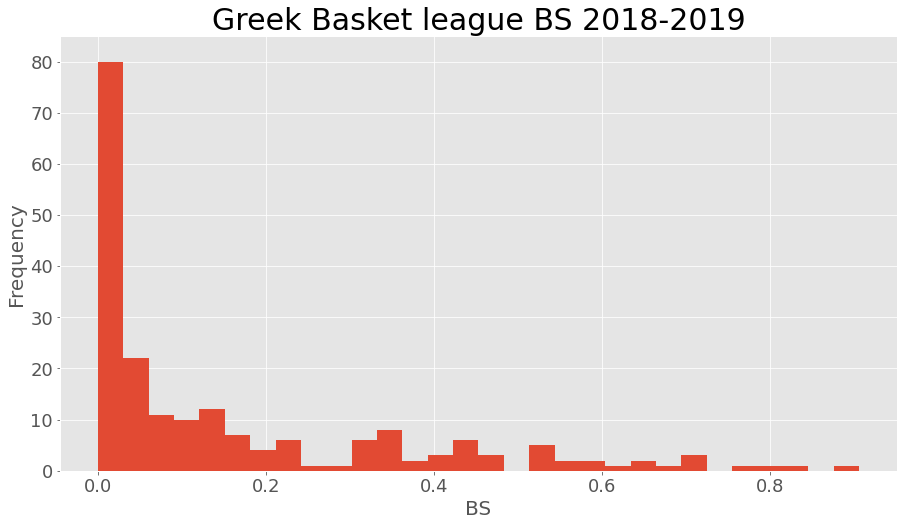

In [20]:
plt.figure(figsize=(15,8))

plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [21]:
see_final_g=x1_greece[["Home Team","Away Team","Team Result","Match Date"]][x1_greece["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [22]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

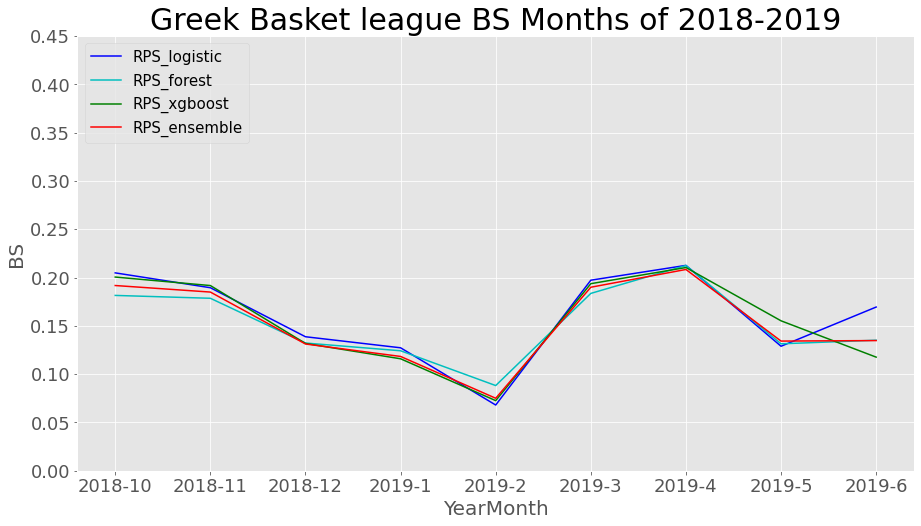

In [23]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Liga ACB

In [24]:
spain_features = pd.read_csv('Features_Per_Tournament/spain_features.csv',sep = ',')

x_spain = spain_features.iloc[:,:-1]
y_spain = spain_features.iloc[:,-1]

x1_spain = data[(data['Tournament'] =="Liga ACB")&(data['Match Date'] >"2015-8-01")]

In [25]:
x_spain.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Regular Season
0,1.0,0.0,3.0,-3.0,-9.554547,-16.175530,1.0,3.0,-9.554547,1.504595,-79438.035358,0.026480,0.059740,-0.780229,-3.059152,-7.440144,-2.431129,-7.269761,-13.022059,-6.022896,4.127012,-3.313132,-1.210742,-0.252042,-2.460363,-1.417288,-2.210297,3.350308,-1.952750,-0.440936,0.656367,-1.695785,-0.916332,0.028515,-1.298020,4.673713,9.345180,3.344016,0.389548,0.528186,1.041430,-1.091956,-2.711338,-2.474414,-2.621137,-0.357457,-1.379659,-0.022403,-1.184309,9.908201,37122.178944,0.011698,-0.1,-0.366667,-5.226286,-1.604217,-0.713700,-9.985417,-14.183333,-9.357500,0.670276,-0.933941,-2.413324,-3.425000,-2.333435,-3.929890,-6.129348,7.245909,-5.856834,-1.140389,-0.294139,-4.727828,-1.409088,-0.044051,-4.486669,-1.489583,6.566667,-1.360000,-1.194160,-3.058333,1.894915,-1.461022,1.059840,5.216256,0.262357,-0.018202,0.122059,2.603038,0.028624,5.322884,13.224816,6.747102,16.135947,9.930251,16.119122,9.911285,-6.747102,2.579834,2.080245,1.863013,0.022114,-0.665010,-0.094940,0.069323,0.022489,-0.265976,-0.091478,0.072051,0.667712,1
1,1.0,0.0,26.0,11.0,31.981365,12.964179,1.0,26.0,31.981365,-0.050557,-28130.087979,-0.076803,-0.090909,0.770221,-1.836370,1.100173,-3.595353,2.224035,4.529412,1.345221,0.842409,1.942582,-0.106723,2.573529,0.655646,-0.226659,0.448221,-2.982094,0.640611,0.681332,1.066876,1.399277,1.346786,-0.725979,0.157563,2.097197,1.731618,2.461029,0.919434,1.803309,-1.084581,-0.952749,-2.139111,4.484811,-0.685505,-0.973472,0.849819,-0.127761,-1.232102,9.029621,-13569.027116,0.010104,-0.3,-7.791667,2.806570,-7.399933,-0.394101,-7.984375,-4.3750

In [26]:
corr_df = spain_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
110,Team Result,1.000000
13,history_pointsdiff,0.423455
9,pi_ratings,0.416360
12,history_winner,0.408552
17,history_FIC,0.397191
19,history_Game_Score,0.395582
53,Current_form_pointsdiff,0.382510
3,tradition_pointsdiff_general,0.380503
15,history_Ediff,0.369126
18,history_Performance_Index,0.357154


## Classifiers

In [27]:
x_spain_scaled = MinMaxScaler().fit_transform(x_spain)

In [28]:
x_train_spain=x_spain_scaled[:len(x1_spain[x1_spain["Match Date"]<"2018-8-1"])]
y_train_spain=y_spain.iloc[:len(x1_spain[x1_spain["Match Date"]<"2018-8-1"])]
x_test_spain=x_spain_scaled[len(x1_spain[x1_spain["Match Date"]<"2018-8-1"]):]
y_test_spain=y_spain.iloc[len(x1_spain[x1_spain["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [29]:
lgr = LogisticRegression(solver='liblinear',C=1.1171121660141514, penalty = "l1").fit(x_train_spain, y_train_spain)
y_pre_proba_lgr=lgr.predict_proba(x_test_spain)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_spain),3))


Logistic Regression

Test BS: 0.214

Test Accuracy: 0.664

Test F1-score: 0.768


In [30]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_spain.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'liga_acb')
sorted_coef1

,feature_name,value
0,tradition_pointsdiff_general,2.346378
1,history_FIC,1.627156
2,pi_ratings,1.622514
3,Tournament_Play,-1.578479
4,history_winner,1.236500
5,history_EFG_received_sd,-1.107634
6,Regular Season,-1.102418
7,Tournament_EDiff_sd,0.840057
8,history_Game_Score,0.533807
9,Current_form_pointsdiff,0.501100


## Random Forest Classifier

In [31]:
rfc = RandomForestClassifier(max_depth= 19, max_features='log2', min_samples_leaf=0.05051947157434511,
                             min_samples_split=0.009080645821703, n_estimators=6,random_state=2
                            ).fit(x_train_spain, y_train_spain)

y_pre_proba_rfc=rfc.predict_proba(x_test_spain)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_spain),3))

Random Forest Classifier

Test BS: 0.206

Test Accuracy: 0.698

Test F1-score: 0.775


In [32]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_spain.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'liga_acb')
sorted_coef2

,feature_name,value
0,pi_ratings,0.126117
1,history_Game_Score,0.109145
2,history_FIC,0.101507
3,history_Play,0.088915
4,tradition_pointsdiff_match,0.083656
5,history_Points,0.057293
6,Current_form_Play,0.053081
7,tradition_pointsdiff_general,0.051382
8,Current_form_pointsdiff,0.039816
9,Current_form_Performance_Index,0.037606


## xgboost

In [33]:
alg = XGBClassifier( colsample_bytree = 0.07729623870011615, gamma=8.97884898043499, learning_rate= 0.06271738449490522, 
                    max_depth= 14, n_estimators= 86, reg_lambda= 0.9451160660551007,subsample= 0.3700523653489849
                    ,objective='binary:logistic').fit(x_train_spain, y_train_spain)

y_pre_proba_alg=alg.predict_proba(x_test_spain)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_spain),3))


xgboost

Test BS: 0.205

Test Accuracy: 0.679

Test F1-score: 0.758


In [34]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_spain.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'liga_acb')
sorted_coef3

,feature_name,value
0,history_Play,0.080276
1,elo,0.048811
2,Current_form_pointsdiff,0.035883
3,tradition_pointsdiff_match,0.032770
4,history_winner,0.029250
5,tradition_pointsdiff_last_match,0.029085
6,history_Performance_Index,0.028647
7,history_pointsdiff,0.028338
8,Current_form_Play,0.026847
9,tradition_winner_general,0.026191


# Ensemble

In [35]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_spain),3))

------Ensemble 3 classifier-------

Test BS: 0.205

Test Accuracy: 0.701

Test F1-score: 0.782


In [36]:
pd.options.display.max_rows = None
see_final_l=x1_spain[["Home Team","Away Team","Team Result"]][x1_spain["Match Date"]>"2018-8-1"]
see_final_l["prediction probability"]=ens_proba
see_final_l["RPS"]=(see_final_l["Team Result"]-see_final_l["prediction probability"])**2
see_final_l[see_final_l["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4070,CB ESTUDIANTES,BÀSQUET MANRESA,0,0.860189,0.739926
4087,CB GRAN CANARIA,OBRADOIRO CAB,0,0.816816,0.667188
4096,CB MIRAFLORES,BASKET ZARAGOZA,0,0.823508,0.678165
4133,BC ANDORRA,BÀSQUET MANRESA,0,0.844210,0.712690
4177,CB 1939 CANARIAS,CB ESTUDIANTES,0,0.842796,0.710306
4182,BASKET ZARAGOZA,BALONCESTO FUENLABRADA,0,0.710789,0.505220
4213,UCAM MURCIA CB,BÀSQUET MANRESA,0,0.751240,0.564362
4244,CB 1939 CANARIAS,BASKET ZARAGOZA,0,0.829652,0.688322
4250,CB ESTUDIANTES,CLUB JOVENTUT BADALONA,0,0.722460,0.521949
4251,REAL MADRID BALONCESTO,BC ANDORRA,0,0.884532,0.782398


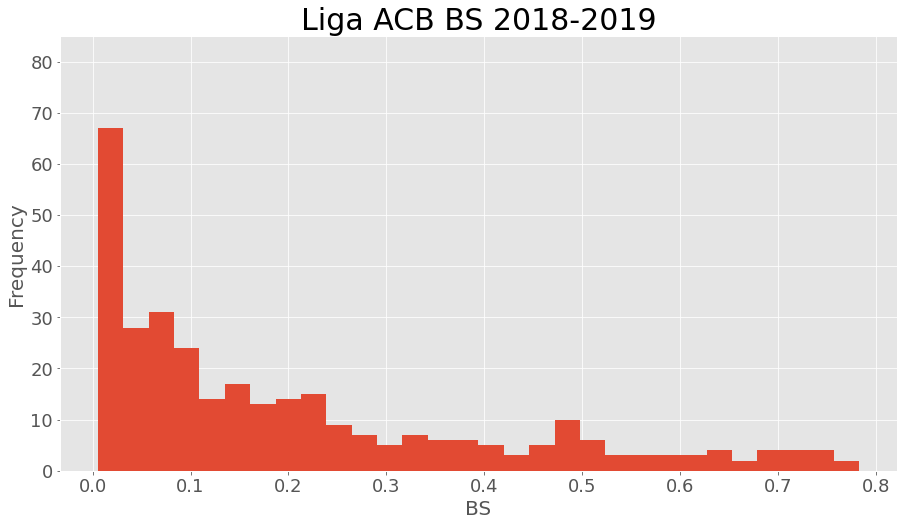

In [37]:
plt.figure(figsize=(15,8))

plt.hist(see_final_l["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [38]:
see_final_g=x1_spain[["Home Team","Away Team","Team Result","Match Date"]][x1_spain["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [39]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

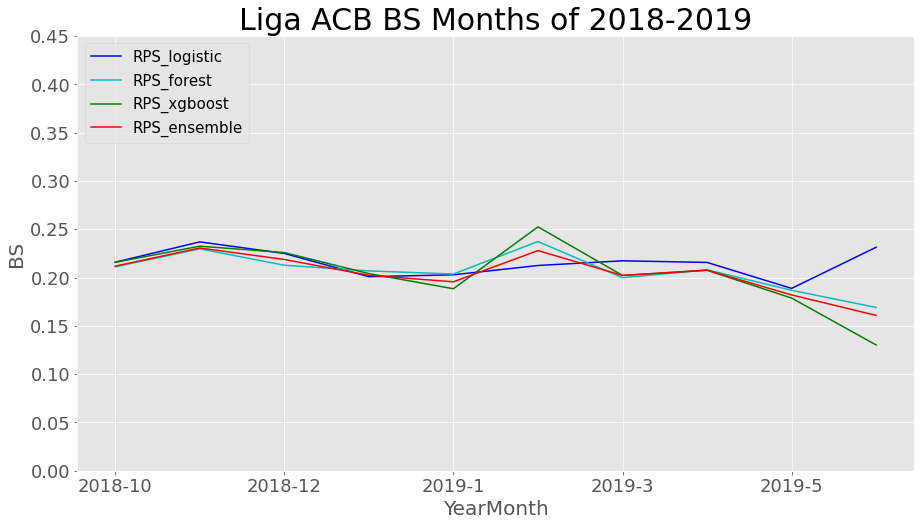

In [40]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Euroleague

In [41]:
euroleague_features = pd.read_csv('Features_Per_Tournament/euroleague_features.csv',sep = ',')

x_el = euroleague_features.iloc[:,:-1]
y_el = euroleague_features.iloc[:,-1]

x1_el = data[(data['Tournament'] =="Euroleague")&(data['Match Date'] >"2015-8-01")]

In [42]:
x_el.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Playoffs,Regular Season,Top 16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.358793,-10820.016379,-0.091342,-0.750000,-7.428571,-11.863854,0.000000,-14.131156,-44.175893,-90.492857,-51.071429,-85.689643,-92.319619,-42.988838,-81.707143,-44.008566,-48.966746,-14.332980,-20.040076,-14.448417,-9.889882,-9.536055,-5.690844,-9.512604,-4.967859,-7.360793,-32.399107,-68.564286,-39.207143,-40.577464,-74.278571,-41.904393,-46.303940,-10.595374,-15.006837,-11.516253,-5.341982,-8.483439,-4.710888,-6.462390,0.000000,0.000000,0.000000,-0.7,-6.333333,-10.559560,0.000000,-13.066978,-40.027083,-84.433333,-46.287500,-83.831892,-91.926827,-42.195136,-77.850,-42.477033,-47.164101,-13.176657,-11.834452,-13.090173,-9.894902,-9.298898,-6.046279,-9.777321,-4.580823,-6.896212,-30.068750,-64.183333,-37.062500,-41.553866,-71.516667,-41.133019,-48.280940,-9.726315,-11.769632,-10.222572,-5.571932,-7.076656,-3.841816,-5.601823,3.484,12.638423,3.867302,15.154101,6.018,10.268,6.338,-3.867302,1.499275,1.605163,1.368411,2.62738,3.364424,2.842635,-1.941112,1.439043,2.011784,0.973937,1.542098,0.624,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.237784,5810.414641,0.012437,0.416667,0.916667,11.095175,0.000000,13.386680,37.204167,78.183333,41.445833,82.697888,85.461659,38.589057,75.475000,41.023884,43.742297,13.084213,20.195724,14.356708,9.968241,10.056713,6.079125,11.497884,5.285048,7.584862,35.917708,73.725000,41.583333,39.269252,74.558333,40.341335,45.132760,13.322689,18.297442,13.449275,5.149601,10.018064,4.805627,6.164874,9.730640,-114.721816,0.012411,0.4,0.800000,11.734421,0.000000,1

In [43]:
corr_df =euroleague_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
112,Team Result,1.000000
13,history_pointsdiff,0.358062
53,Current_form_pointsdiff,0.314461
9,pi_ratings,0.312067
12,history_winner,0.311495
15,history_Ediff,0.309545
11,pagerank,0.280620
52,Current_form_winner,0.262249
55,Current_form_EDiff,0.259204
17,history_FIC,0.256339


## Classifiers

In [44]:
x_el_scaled = MinMaxScaler().fit_transform(x_el)

In [45]:
x_train_el=x_el_scaled[:len(x1_el[x1_el["Match Date"]<"2018-8-1"])]
y_train_el=y_el.iloc[:len(x1_el[x1_el["Match Date"]<"2018-8-1"])]
x_test_el=x_el_scaled[len(x1_el[x1_el["Match Date"]<"2018-8-1"]):]
y_test_el=y_el.iloc[len(x1_el[x1_el["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [46]:
lgr = LogisticRegression(solver = "liblinear",penalty = 'l2',C= 0.18004542465707152).fit(x_train_el,y_train_el)
y_pre_proba_lgr=lgr.predict_proba(x_test_el)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(y_pre_proba_lgr[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_el),3))

Logistic Regression

Test BS: 0.189

Test Accuracy: 0.708

Test F1-score: 0.787


In [47]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_el.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'euroleague')
sorted_coef1

,feature_name,value
0,history_pointsdiff,0.599790
1,pagerank,0.503465
2,pi_ratings,0.479920
3,Top 16,0.464054
4,history_FIC_received_sd,-0.444457
5,Current_form_pointsdiff,0.426970
6,history_winner,0.409496
7,history_Drtg_sd,-0.367120
8,history_Ediff,0.358173
9,history_Game_Score_received_sd,-0.334486


## Random Forest Classifier

In [48]:
rfc = RandomForestClassifier(max_depth= 23, max_features='log2', min_samples_leaf=0.09173060912716552,
                             min_samples_split=0.0453337140365549, n_estimators=4,
                             random_state=2).fit(x_train_el, y_train_el)

y_pre_proba_rfc=rfc.predict_proba(x_test_el)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_el),3))

Random Forest Classifier

Test BS: 0.199

Test Accuracy: 0.696

Test F1-score: 0.772


In [49]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_el.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'euroleague')
sorted_coef2

,feature_name,value
0,Current_form_EDiff,0.279633
1,pagerank,0.122910
2,history_Ortg,0.122853
3,Current_form_FIC_received,0.104841
4,Current_form_FIC,0.082458
5,history_EFG_received,0.071208
6,history_Game_Score,0.053018
7,history_Performance_Index,0.043535
8,history_Points_received_sd,0.040524
9,history_Drtg,0.022711


## xgboost

In [50]:
alg = XGBClassifier(colsample_bytree=0.08978735702676666,gamma= 9.580517477927494,
                    learning_rate= 0.1641745913705116, max_depth=39, n_estimators=33,
                    reg_lambda= 0.6415591428560243,subsample=0.9964435009093792,
                    objective='binary:logistic').fit(x_train_el, y_train_el)

y_pre_proba_alg=alg.predict_proba(x_test_el)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_el),3))


xgboost

Test BS: 0.196

Test Accuracy: 0.696

Test F1-score: 0.777


In [51]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_el.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'euroleague')
sorted_coef3

,feature_name,value
0,Current_form_FIC_received,0.067562
1,history_FIC_received_sd,0.067519
2,pagerank,0.058999
3,Current_form_pointsdiff,0.055775
4,history_Ediff,0.044391
5,pi_ratings,0.042509
6,history_winner,0.042456
7,history_Performance_Index,0.034362
8,history_Points_received,0.030505
9,history_Play,0.029831


# Ensemble 

In [52]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_el,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_el),3))

------Ensemble 3 classifier-------

Test BS: 0.192

Test Accuracy: 0.708

Test F1-score: 0.789


In [53]:
see_final_el=x1_el[["Home Team","Away Team","Team Result"]][x1_el["Match Date"]>"2018-8-1"]
see_final_el["prediction probability"]=y_pre_proba_alg[:,1]
see_final_el["RPS"]=(see_final_el["Team Result"]-see_final_el["prediction probability"])**2
see_final_el[see_final_el["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4126,BC ŽALGIRIS,SASKI BASKONIA,0,0.722436,0.521913
4169,OLYMPIACOS B.C.,OLIMPIA MILANO,0,0.754221,0.568849
4170,BC KHIMKI,ANADOLU EFES S.K.,0,0.709799,0.503815
4308,BC ŽALGIRIS,FC BARCELONA BÀSQUET,0,0.862765,0.744364
4352,BC ŽALGIRIS,BC KHIMKI,0,0.835654,0.698317
4379,OLIMPIA MILANO,CB GRAN CANARIA,0,0.730653,0.533854
4417,FC BAYERN MUNICH (BASKETBALL),BC ŽALGIRIS,1,0.286057,0.509715
4459,SASKI BASKONIA,FC BARCELONA BÀSQUET,0,0.729233,0.531781
4462,PANATHINAIKOS B.C.,OLIMPIA MILANO,0,0.729282,0.531853
4540,BC ŽALGIRIS,ANADOLU EFES S.K.,0,0.790823,0.625402


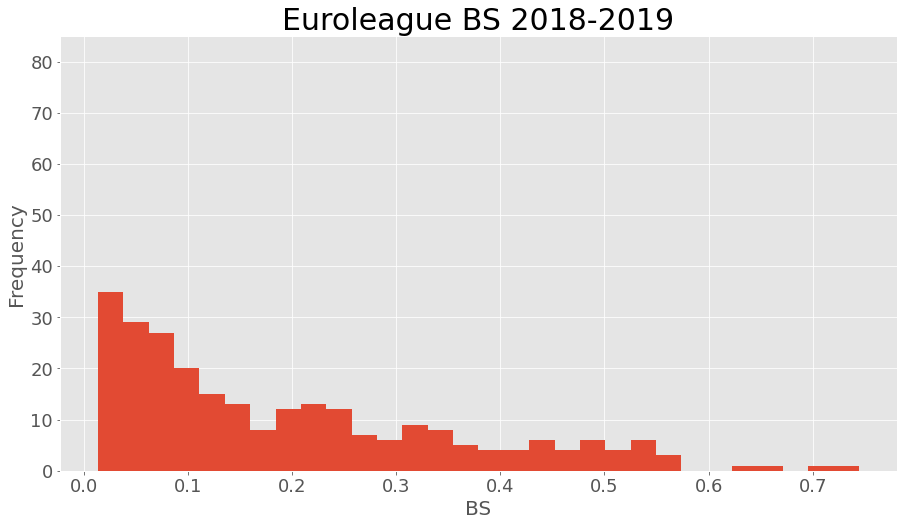

In [54]:
plt.figure(figsize=(15,8))

plt.hist(see_final_el["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [55]:
see_final_g=x1_el[["Home Team","Away Team","Team Result","Match Date"]][x1_el["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [56]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

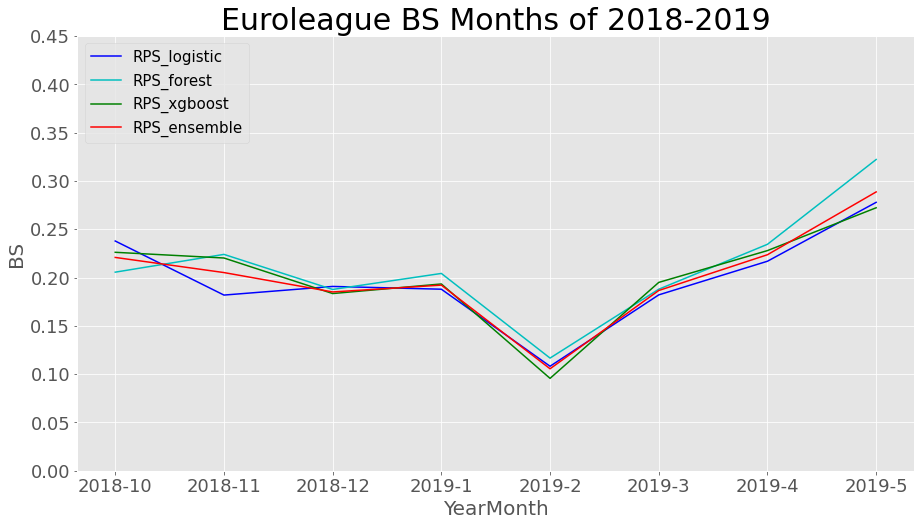

In [57]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Eurocup

In [58]:
eurocup_features = pd.read_csv('Features_Per_Tournament/eurocup_features.csv',sep = ',')

x_ec = eurocup_features.iloc[:,:-1]
y_ec = eurocup_features.iloc[:,-1]

x1_ec = data[(data['Tournament'] =="Eurocup")&(data['Match Date'] >"2015-8-01")]

In [59]:
x_ec.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Last 32,Quarter-Finals,Regular Season,Semifinals,Top 16
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,-12.204556,-84778.730778,-0.068963,-0.875000,-7.750000,-12.031433,0.000000,-15.231253,-46.735417,-93.225000,-52.829167,-82.748809,-95.822290,-44.933163,-81.766667,-45.792852,-51.417946,-14.092594,-19.440187,-14.535802,-11.518226,-10.814450,-6.246255,-10.008990,-5.298085,-7.418151,-27.475000,-58.600000,-35.679167,-39.525197,-74.016667,-40.882390,-46.374785,-13.239145,-17.673638,-13.273851,-6.045248,-7.451631,-5.194044,-6.408320,0.000000,0.000000,0.000000,-0.8,-1.4,-12.534235,0.000000,-15.477060,-41.5625,-84.8,-47.51,-89.491081,-94.105363,-42.664928,-78.0,-43.369988,-47.418733,-14.253387,-15.856390,-13.740697,-8.635730,-10.379517,-7.175533,-9.162990,-6.330837,-8.524397,-33.6750,-68.1,-42.06,-42.053929,-76.6,-43.174974,-48.002890,-12.249256,-12.397846,-11.423284,-5.517351,-7.601393,-4.536903,-6.314649,2.797386,13.131492,2.974624,16.534765,6.093137,10.029412,5.888562,-2.974624,0.949752,0.597564,0.333961,0.985668,1.540137,1.094944,-0.521717,0.409131,0.733025,0.187497,0.257893,0.598039,0,0,1,0,0
1,-1.0,-1.0,-2.0,-33.0,-9.933820,-51.215100,-1.0,-2.0,-9.933820,-1.219377,-192575.811200,-0.018749,-0.062500,-7.912500,-3.475914,-8.826563,-2.039553,-6.034375,-6.650000,-9.030000,0.961973,-7.864590,-4.032841,-5.812500,-1.319172,-3.133374,-0.461413,-1.925592,-0.815561,-4.787256,-1.323187,-0.554788,-0.473220,-1.201433,-1.283288,3.131250,4.262500,2.925000,-1.305496,2.100000,-0.987234,-2.671026,-7.407501,-10.343074,-9.800946,-2.981906,-7.653529,-3.518435,-4.481

In [60]:
corr_df =eurocup_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
114,Team Result,1.000000
13,history_pointsdiff,0.318954
15,history_Ediff,0.311300
53,Current_form_pointsdiff,0.305181
55,Current_form_EDiff,0.290270
9,pi_ratings,0.271886
52,Current_form_winner,0.264498
10,elo,0.261306
12,history_winner,0.245544
17,history_FIC,0.199579


## Classifiers

In [61]:
x_ec_scaled = MinMaxScaler().fit_transform(x_ec)

In [62]:
x_train_ec=x_ec_scaled[:len(x1_ec[x1_ec["Match Date"]<"2018-8-1"])]
y_train_ec=y_ec.iloc[:len(x1_ec[x1_ec["Match Date"]<"2018-8-1"])]
x_test_ec=x_ec_scaled[len(x1_ec[x1_ec["Match Date"]<"2018-8-1"]):]
y_test_ec=y_ec.iloc[len(x1_ec[x1_ec["Match Date"]<"2018-8-1"]):]

## Logistic Regression

In [63]:
lgr = LogisticRegression(solver="liblinear",C=0.11202934112738094, penalty= 'l2').fit(x_train_ec,y_train_ec)
y_pre_proba_lgr=lgr.predict_proba(x_test_ec)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(y_pre_proba_lgr[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_ec),3))

Logistic Regression

Test BS: 0.206

Test Accuracy: 0.683

Test F1-score: 0.767


In [64]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_ec.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef1,'eurocup')
sorted_coef1

,feature_name,value
0,pi_ratings,0.387238
1,history_pointsdiff,0.371165
2,history_Ediff,0.348405
3,elo,0.336082
4,Current_form_pointsdiff,0.288018
5,Current_form_EDiff,0.285549
6,Current_form_winner,0.263171
7,Current_form_FIC_received,-0.257365
8,Current_form_Game_Score_received,-0.252128
9,Current_form_Performance_Index_received,-0.231134


## Random Forest Classifier

In [65]:
rfc = RandomForestClassifier(max_depth= 20, max_features='log2', min_samples_leaf=0.018815423604170822,
                             min_samples_split=0.231123081097249, n_estimators=41,
                             random_state=2).fit(x_train_ec, y_train_ec)

y_pre_proba_rfc=rfc.predict_proba(x_test_ec)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_ec),3))

Random Forest Classifier

Test BS: 0.199

Test Accuracy: 0.704

Test F1-score: 0.784


In [66]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_ec.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef2,'eurocup')
sorted_coef2

,feature_name,value
0,history_pointsdiff,0.125575
1,pi_ratings,0.059252
2,Current_form_Performance_Index_received,0.044723
3,Current_form_FIC_received,0.039002
4,history_Play_received,0.031293
5,Current_form_Drtg_sd,0.030289
6,Current_form_pointsdiff,0.030135
7,history_Ediff,0.029765
8,history_winner,0.029462
9,history_Drtg,0.028160


## xgboost

In [67]:
alg = XGBClassifier(colsample_bytree=0.18034283170379617,gamma = 2.688094427224775,learning_rate= 0.08143707355158153, 
                    max_depth=1,n_estimators=46,reg_lambda= 0.9440898051715958,subsample=0.46431618708247235,
                    objective='binary:logistic').fit(x_train_ec, y_train_ec)

y_pre_proba_alg=alg.predict_proba(x_test_ec)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_ec),3))


xgboost

Test BS: 0.196

Test Accuracy: 0.694

Test F1-score: 0.771


In [68]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_ec.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
#features_creation().features_count(sorted_coef3,'eurocup')
sorted_coef3

,feature_name,value
0,Current_form_EDiff,0.121560
1,Current_form_pointsdiff,0.067250
2,history_pointsdiff,0.056455
3,history_Ediff,0.055747
4,pagerank,0.046079
5,history_FIC,0.044210
6,pi_ratings,0.041299
7,Current_form_Points_received,0.040721
8,history_winner,0.040418
9,Tournament_Game_Score,0.039552


# Ensemble

In [69]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_ec),3))

------Ensemble 3 classifier-------

Test BS: 0.199

Test Accuracy: 0.704

Test F1-score: 0.783


In [70]:
see_final_ec=x1_ec[["Home Team","Away Team","Team Result"]][x1_ec["Match Date"]>"2018-8-1"]
see_final_ec["prediction probability"]=y_pre_proba_alg[:,1]
see_final_ec["RPS"]=(see_final_ec["Team Result"]-see_final_ec["prediction probability"])**2
see_final_ec[see_final_ec["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4158,BC RYTAS,SKYLINERS FRANKFURT,0,0.749555,0.561833
4228,PBC LOKOMOTIV KUBAN,ALBA BERLIN,0,0.816254,0.666271
4260,AS MONACO BASKET,PALLACANESTRO BRESCIA,0,0.758481,0.575293
4298,PALLACANESTRO BRESCIA,BC ANDORRA,0,0.764954,0.585155
4403,ASVEL BASKET,KK PARTIZAN,0,0.766444,0.587437
4439,KK CEDEVITA JUNIOR,TOFAŞ S.K.,0,0.767568,0.589160
4455,PALLACANESTRO BRESCIA,RATIOPHARM ULM,0,0.776538,0.603011
4508,PBC LOKOMOTIV KUBAN,ASVEL BASKET,0,0.727867,0.529790
4610,AS MONACO BASKET,KK PARTIZAN,0,0.724295,0.524603
4765,ASVEL BASKET,BC ANDORRA,0,0.760687,0.578645


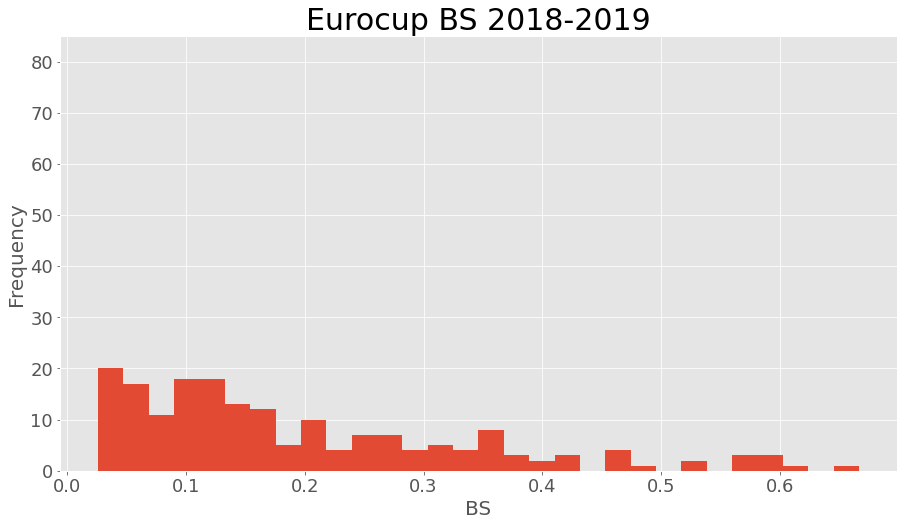

In [71]:
plt.figure(figsize=(15,8))

plt.hist(see_final_ec["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup BS 2018-2019',fontsize=30)
plt.ylim(0,85)
plt.show()

In [72]:
see_final_g=x1_ec[["Home Team","Away Team","Team Result","Match Date"]][x1_ec["Match Date"]>"2018-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [73]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

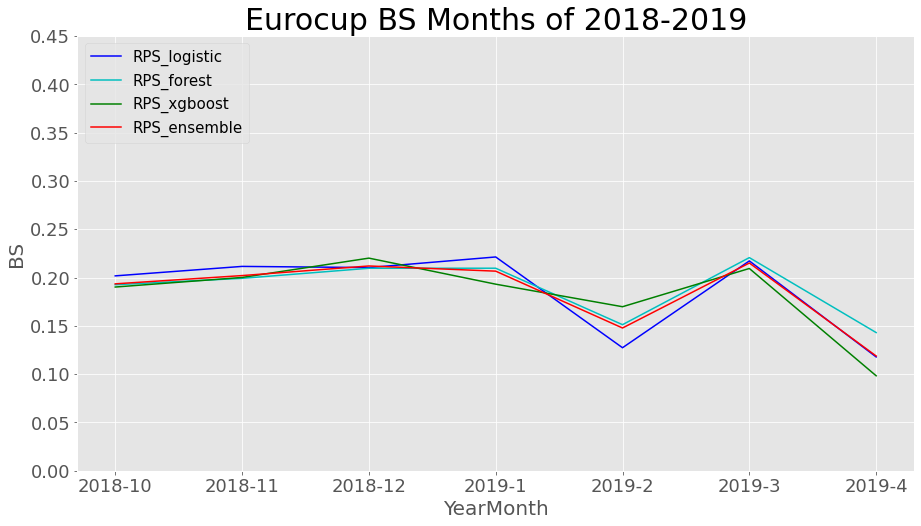

In [74]:

res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup BS Months of 2018-2019',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()